In [1]:
import numpy as np
np.random.seed(1018)
import matplotlib.pyplot as plt
import random as rm
import pandas as pd

In [2]:
from keras.layers import Dense,LSTM,GRU,TimeDistributed
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam

/home/ithcx/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
indice = 2000
BATCH_START = 0
BATCH_SIZE = 50
TIME_STEPS = 20
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.001

In [9]:
data_list = pd.read_csv("chfdb_chf01_275.txt",delimiter='\t',header=None)

(3751, 3)


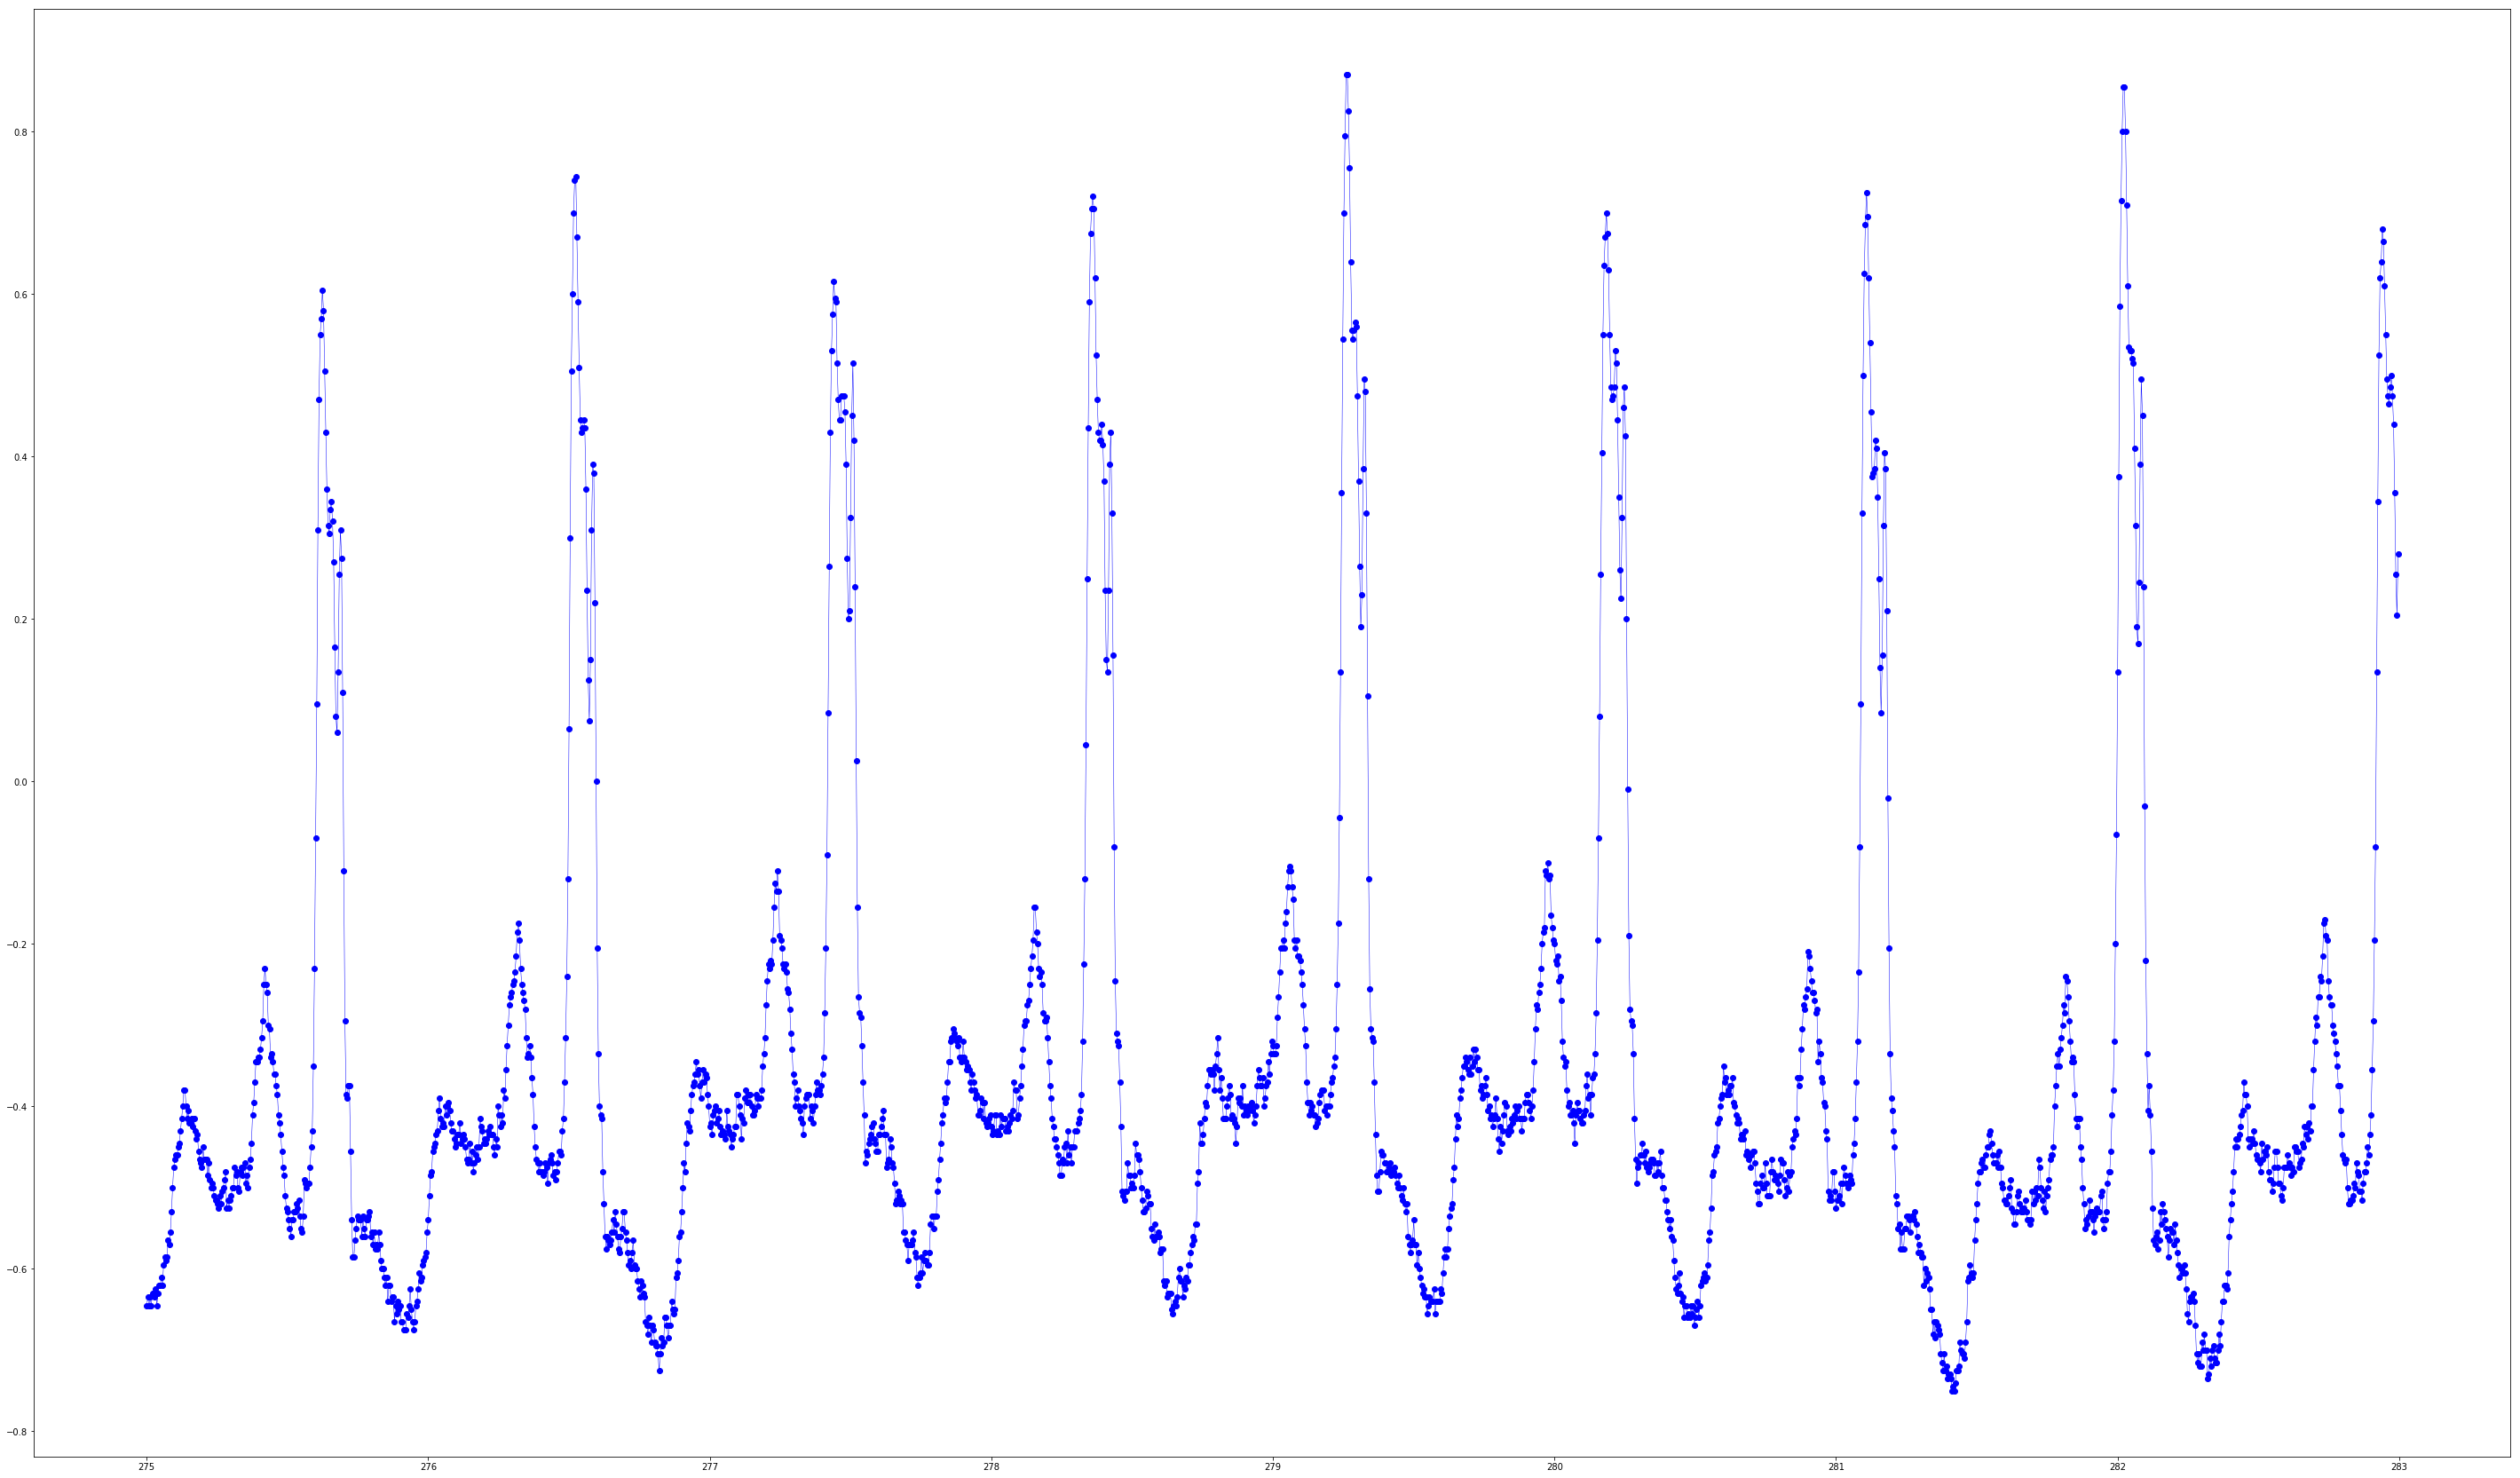

In [21]:
data_arr = np.array(data_list)
print(data_arr.shape)
plt.figure(figsize=(50,30))
plt.plot(data_arr[0:indice,0],data_arr[0:indice,1],'bo-',linewidth = 0.5)
plt.show()

In [14]:
X_train = data_arr[0:indice,1]

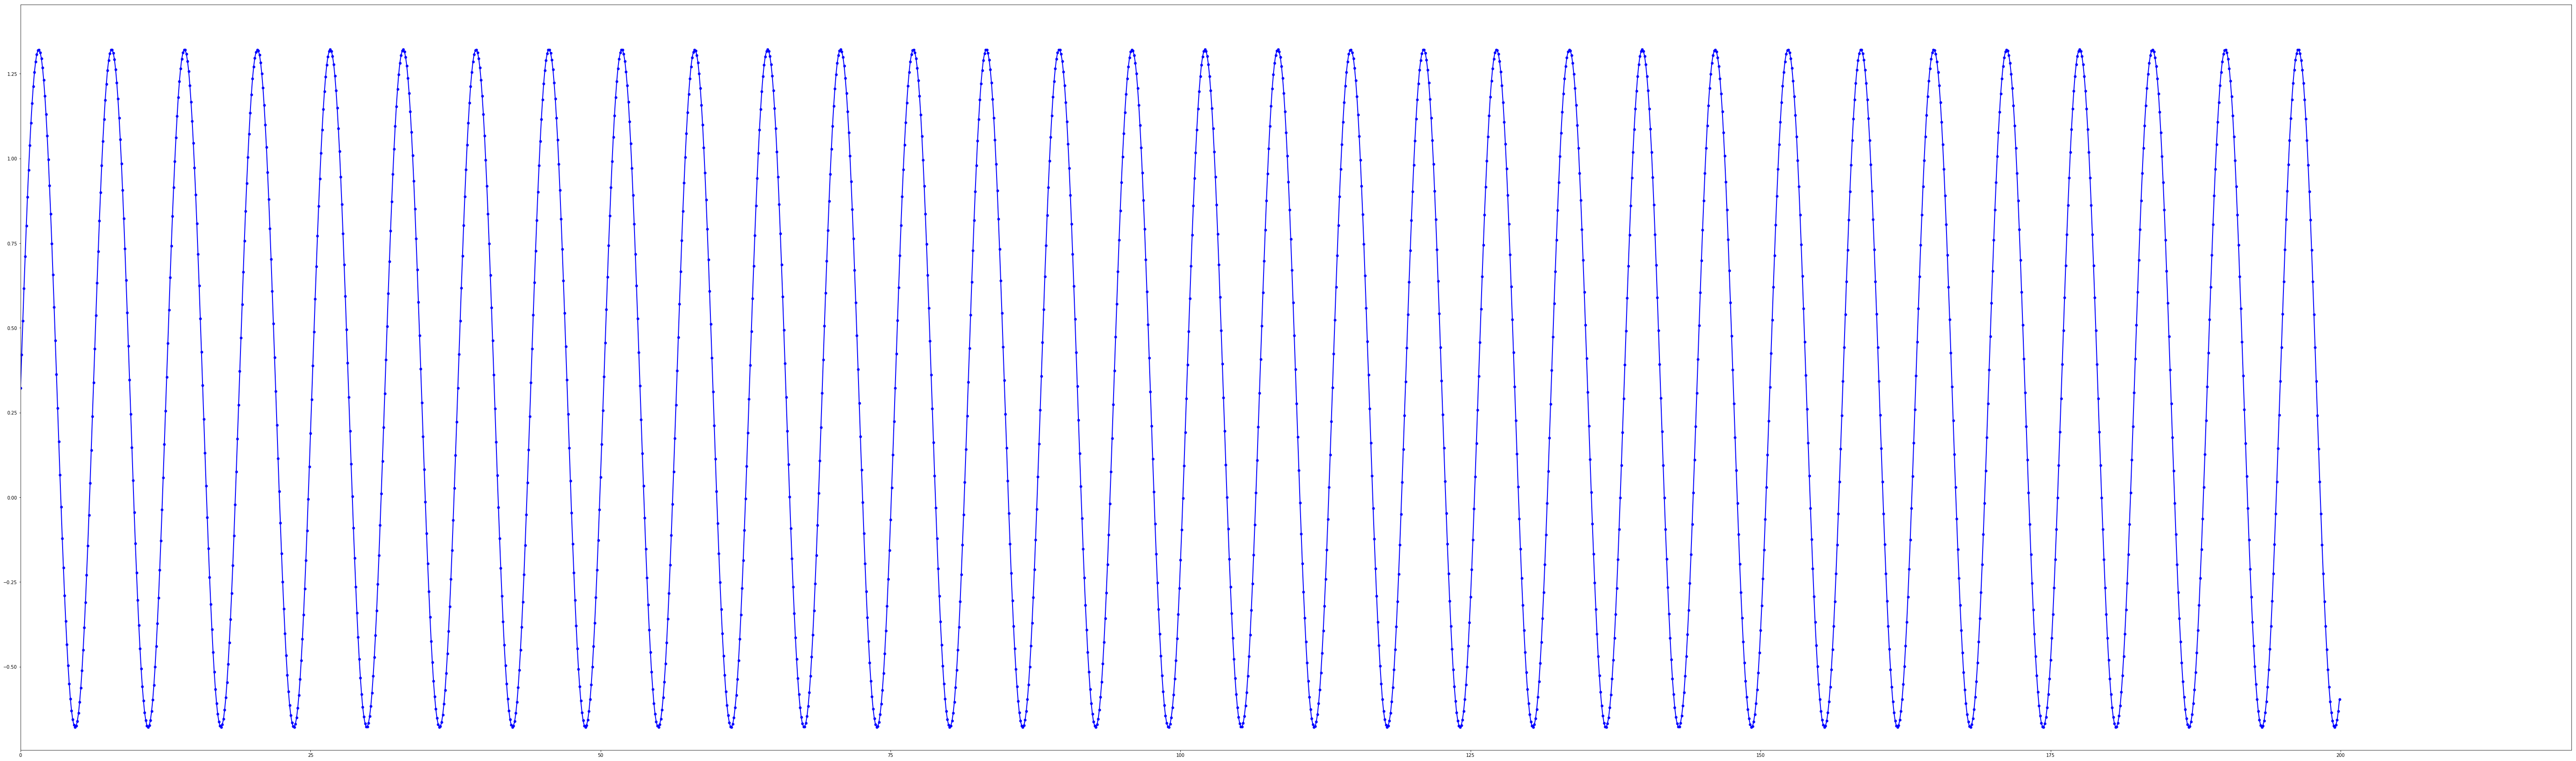

In [4]:
# x = np.linspace(-np.pi*30,np.pi*30,indice)
# x = np.linspace(0,1000,indice)
# y = rm.uniform(-0.5,0.5)+np.sin(x)
# y = np.round(y,3)
# x = np.round(x,3)
# print("序列中最小值为:",y.min())
# print("序列中最大值为:",y.max())
# Y = (y - y.min())*1000
# print("将序列非负化后最小值为:",Y.min())
# print("将序列非负化后最大值为:",Y.max())
# # seq = tf.one_hot(Y,Y.max())
# # with tf.Session() as sess:
# # 	print("onehot编码后:","\n",sess.run(seq))
# Y = Y.astype(np.int32)
# print(x.shape,y.shape)
x = np.arange(0,200,0.1)
indice = x.shape[0]
y = rm.uniform(-0.5,0.5)+np.sin(x)
y = np.round(y,3)

plt.figure(figsize=(100,30))
plt.xlim(x.min()*1.1,x.max()*1.1,)
plt.ylim(y.min()*1.1,y.max()*1.1)
plt.plot(x,y,"bo-",linewidth=2, markersize=5)
plt.show()

In [5]:
# plt.figure(figsize=(100,30))
# plt.yticks(np.arange(-1.5,1.5,0.1))
# plt.xticks(np.arange(-np.pi*20,np.pi*20,0.5))
# plt.xlim(x.min()*1.1,x.max()*1.1,)
# plt.ylim(y.min()*1.1,y.max()*1.1)
# plt.scatter(x,Y)
# plt.plot(x,y,"bo-",linewidth=2, markersize=5)
# plt.show()

In [8]:
def getbatch(x,y):
	global BATCH_START,TIME_STEPS
	xs = x[BATCH_START:BATCH_START+BATCH_SIZE*TIME_STEPS].reshape(BATCH_SIZE,TIME_STEPS)
	seq = y[BATCH_START:BATCH_START+BATCH_SIZE*TIME_STEPS].reshape(BATCH_SIZE,TIME_STEPS)
	res = y[BATCH_START+1:BATCH_START+BATCH_SIZE*TIME_STEPS+1].reshape(BATCH_SIZE,TIME_STEPS)
	BATCH_START += TIME_STEPS
	if BATCH_START+BATCH_SIZE*TIME_STEPS >= xs.shape[0]:
		BATCH_START = 0
	return seq[:,:,np.newaxis],res[:,:,np.newaxis],xs

In [9]:
x_batch,y_batch,xs = getbatch(x,y)
print(X_batch.shape,Y_batch.shape,xs.shape)
BATCH_START = 0

NameError: name 'X_batch' is not defined

In [10]:
model = Sequential()
model.add(LSTM(CELL_SIZE,batch_input_shape=(BATCH_SIZE,TIME_STEPS,INPUT_SIZE),return_sequences=True,stateful=True))
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))
optimizer = Adam()

In [11]:
model.compile(optimizer=optimizer,loss='mse')

In [12]:
print('-'*50,'training','-'*50)
for step in range(501):
	X_batch,Y_batch,xs = getbatch(x,y)
	cost = model.train_on_batch(X_batch,Y_batch)
	if step % 10 == 0:
		print("train cost:",cost)

-------------------------------------------------- training --------------------------------------------------
train cost: 0.57562774
train cost: 0.37283996
train cost: 0.24016774
train cost: 0.17809273
train cost: 0.16094863
train cost: 0.14385082
train cost: 0.13313662
train cost: 0.12605634
train cost: 0.12034941
train cost: 0.11545191
train cost: 0.11061914
train cost: 0.10584588
train cost: 0.10112711
train cost: 0.0964662
train cost: 0.091865376
train cost: 0.08734946
train cost: 0.08293497
train cost: 0.07862756
train cost: 0.074437164
train cost: 0.07037873
train cost: 0.06646225
train cost: 0.0626916
train cost: 0.059065074
train cost: 0.055581566
train cost: 0.05223875
train cost: 0.049035683
train cost: 0.045971856
train cost: 0.043045826
train cost: 0.04025444
train cost: 0.03759259
train cost: 0.035054483
train cost: 0.03263135
train cost: 0.03031652
train cost: 0.028102893
train cost: 0.025984026
train cost: 0.023954537
train cost: 0.022007573
train cost: 0.020163331
trai

In [13]:
def prediction(x_batch):
	pred = model.predict(x_batch,batch_size=x_batch.shape[0],verbose=False)
	return pred

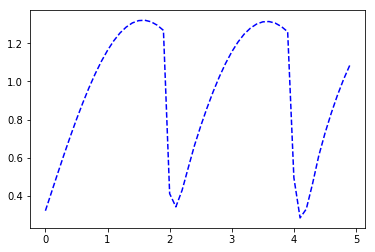

In [14]:
BATCH_START = 0
sequence = []
x_batch,y_batch,xs = getbatch(x,y)
sequence.append(x_batch.flatten()[:TIME_STEPS])
for i in range(49):
	x_batch = prediction(x_batch)
	sequence.append(x_batch.flatten()[:TIME_STEPS])
sequence_y_data = np.array(sequence).flatten()
# sequence_x_data = x[0:sequence_y_data.shape[0]]
plt.figure()
# plt.plot(x[0:sequence_y_data.shape[0]],sequence_y_data,'b--')
plt.plot(x[0:BATCH_SIZE],sequence_y_data[0:BATCH_SIZE],'b--')
plt.show()